# IMDB TV SERIES ANALYSIS

## Conducting a data visualization project to find out which TV series has the best episodes on IMDB with the use of data obtained from the Top 200 rated IMDB episodes

### DATA LOADING AND COLLECTION

In [1]:
## Loading the csv file of the Top 200 rated episodes of TV shows on IMDB
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e62b6c1bb76c4710b1d1cc5aeab9a929 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9ZymKSD_6E0Aw3YRO1fn1RBF95BmxW_zKvIslTE4CC4g',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e62b6c1bb76c4710b1d1cc5aeab9a929.get_object(Bucket='databel-donotdelete-pr-d4qsbyzwywn9lq',Key='Top 200 rated IMDB TV episodes - Sheet1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,TV show,Episode,Genre,Rating,Year,Votes
0,Attack on Titan,Hero,"Animation, Action, Adventure",10.0,2019,20785
1,Attack on Titan,Perfect Game,"Animation, Action, Adventure",9.9,2019,7060
2,Chernobyl,Vichnaya Pamyat,"Drama, History",9.9,2019,44285
3,Game of Thrones,The Winds of Winter,"Action, Adventure, Drama",9.9,2016,125599
4,Game of Thrones,Battle of the Bastards,"Action, Adventure, Drama",9.9,2016,181164


In [2]:
## Creating a new dataframe called "df_tv"
df_tv = df_data_1

In [3]:
## Checking the name of the columns
df_tv.columns

Index(['TV show', 'Episode', 'Genre', 'Rating', 'Year', 'Votes'], dtype='object')

In [4]:
## Transforming certain columns into numeric
df_tv[['Rating', 'Year', 'Votes']] = df_tv[['Rating', 'Year', 'Votes']].convert_objects(convert_numeric = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


### DATA ANALYSIS AND VISUALIZATION

In [5]:
## Creating a new dataframe based on year and votes
df_tv1 = df_tv[['Year', 'Votes']]
## Grouping year based on votes
df_tv1 = df_tv1.groupby(['Year'],as_index=False).sum()
df_tv1.head()

,Year,Votes
0,1994,1603
1,1995,3644
2,1999,5451
3,2001,25667
4,2004,24635


In [6]:
## Importing Data Visualization packages
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

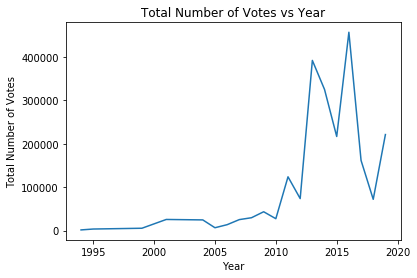

In [7]:
## A line plot showing Total Number of Votes vs Year
sns.lineplot(x="Year", y="Votes", data=df_tv1)
plt.xlabel('Year')
plt.ylabel('Total Number of Votes')
plt.title('Total Number of Votes vs Year')
plt.show()

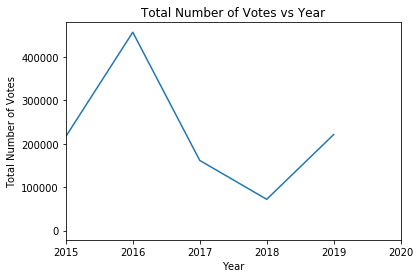

In [8]:
## A line plot showing Total Number of Votes vs Year from the year 2015 to 2020
sns.lineplot(x="Year", y="Votes", data=df_tv1)
plt.xlabel('Year')
plt.ylabel('Total Number of Votes')
plt.title('Total Number of Votes vs Year')
plt.xlim(2015,2020)
plt.show()

In [9]:
## Finding out how many votes 2016 had
df_tv1_1 = df_tv1.sort_values(by = ['Votes'], ascending= False)
df_tv1_2 = df_tv1_1.reset_index()
df_tv1_2.drop("index", axis = 1, inplace = True)
df_tv1_2.head()

,Year,Votes
0,2016,456505
1,2013,391674
2,2014,324809
3,2019,221062
4,2015,216606


In [10]:
## Creating a new dataframe based on genre
df_tv2 = df_tv[['Genre']]

In [11]:
## Rearranging the dataframe
df_tv2_1 = df_tv2['Genre'].str.split(", ", n = 2, expand = True)

In [12]:
df_tv2_1.head()

,0,1,2
0,Animation,Action,Adventure
1,Animation,Action,Adventure
2,Drama,History,None
3,Action,Adventure,Drama
4,Action,Adventure,Drama


In [13]:
df_tv2_1.rename(columns = {0: "Genre1", 1: "Genre2", 2: "Genre3"}, inplace = True)

In [14]:
df_tv2_1.head()

,Genre1,Genre2,Genre3
0,Animation,Action,Adventure
1,Animation,Action,Adventure
2,Drama,History,None
3,Action,Adventure,Drama
4,Action,Adventure,Drama


In [15]:
## Concatenating the dataframe columns as rows
df_tv2_2 = pd.concat([df_tv2_1['Genre1'], df_tv2_1['Genre2'], df_tv2_1['Genre3']], axis=0, ignore_index = True)

In [16]:
df_tv2_2.head()

0    Animation
1    Animation
2        Drama
3       Action
4       Action
dtype: object

In [17]:
df_tv2_2 = pd.DataFrame(df_tv2_2)
df_tv2_2.columns = ['Genre']
df_tv2_2.head()

,Genre
0,Animation
1,Animation
2,Drama
3,Action
4,Action


In [18]:
## Creating a table for the frequency of each genre
df_tv2_3 = df_tv2_2
df_tv2_3 = df_tv2_3['Genre'].value_counts().to_frame()
df_tv2_3.rename(columns={'Genre': 'Frequency'}, inplace=True)
df_tv2_3.index.name = "Genre"
df_tv2_3.head()

,Frequency
Genre,
Drama,143
Action,68
Adventure,58
Crime,51
Comedy,45


In [19]:
df_tv2_3['Frequency'].sum()

506

In [20]:
df_tv2_3 = df_tv2_3.sort_values(by = ['Frequency'], ascending= True)

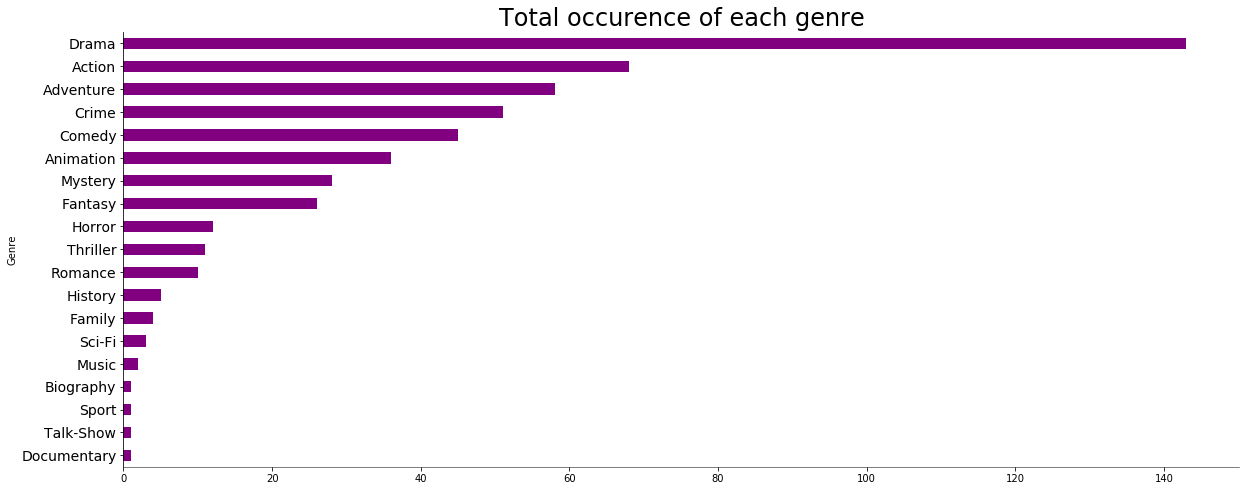

In [21]:
## A horizontal bar graph showing us which genre got the most occurences
bar = df_tv2_3.plot(kind='barh',figsize=(20, 8), color = "purple", legend = None)
bar
plt.yticks(fontsize = 14)
plt.title("Total occurence of each genre", fontsize=24)
bar.spines['top'].set_visible(False)
bar.spines['right'].set_visible(False)
bar.spines['bottom'].set_linewidth(0.5)
bar.spines['left'].set_visible(True)
plt.show()

In [22]:
## Creating a new dataframe based on TV show, Rating and Votes
df_tv3 =  df_tv[['TV show', 'Rating', 'Votes']]

In [23]:
df_tv3 = df_tv3.groupby(['TV show'],as_index=False).mean()

In [24]:
df_tv3.head()

,TV show,Rating,Votes
0,12 Monkeys,9.70,1039.0
1,Adventure Time,9.60,1279.0
2,Angel,9.70,2246.5
3,Arrow,9.65,8574.0
4,Atlanta,9.70,3974.0


In [25]:
## Creating a table for the frequency of each TV show
df_tv4 = df_tv[['TV show']]
df_tv4 = df_tv4['TV show'].value_counts().to_frame()
df_tv4.rename(columns={'TV show': 'Frequency'}, inplace=True)
df_tv4.index.name = "TV show"
df_tv4 = df_tv4.sort_values(by = ['Frequency'], ascending= False)
df_tv4.head()

,Frequency
TV show,
Attack on Titan,16
Game of Thrones,14
Code Black,9
Person of Interest,8
Community,5


In [26]:
## merging two dataframes
df_tv5 = pd.merge(df_tv3,df_tv4, on = "TV show")
df_tv5 = df_tv5.sort_values(by = ['Frequency'], ascending= False)
df_tv5.head()

,TV show,Rating,Votes,Frequency
5,Attack on Titan,9.731250,5154.062500,16
29,Game of Thrones,9.742857,65672.714286,14
18,Code Black,9.644444,1085.888889,9
54,Person of Interest,9.675000,6060.000000,8
13,Breaking Bad,9.780000,53357.400000,5


In [27]:
## Getting a dataframe of the top 20 rows while cleaning the dataframe
df_tv6 = df_tv5.reset_index()
df_tv7 = df_tv6.head(20)
df_tv7.drop("index", axis = 1, inplace = True)
df_tv7.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,TV show,Rating,Votes,Frequency
0,Attack on Titan,9.731250,5154.062500,16
1,Game of Thrones,9.742857,65672.714286,14
2,Code Black,9.644444,1085.888889,9
3,Person of Interest,9.675000,6060.000000,8
4,Breaking Bad,9.780000,53357.400000,5


In [28]:
df_tv7.corr()

,Rating,Votes,Frequency
Rating,1.000000,0.566137,0.278283
Votes,0.566137,1.000000,0.301582
Frequency,0.278283,0.301582,1.000000


In [29]:
## Creating a new dataframe based on TV show and Frequency based on df_tv7
df_tv8 = df_tv7[['TV show', 'Frequency']]
id_use = df_tv8.set_index('TV show', inplace = True)
df_tv8 = df_tv8.sort_values(by = ['Frequency'], ascending = True)

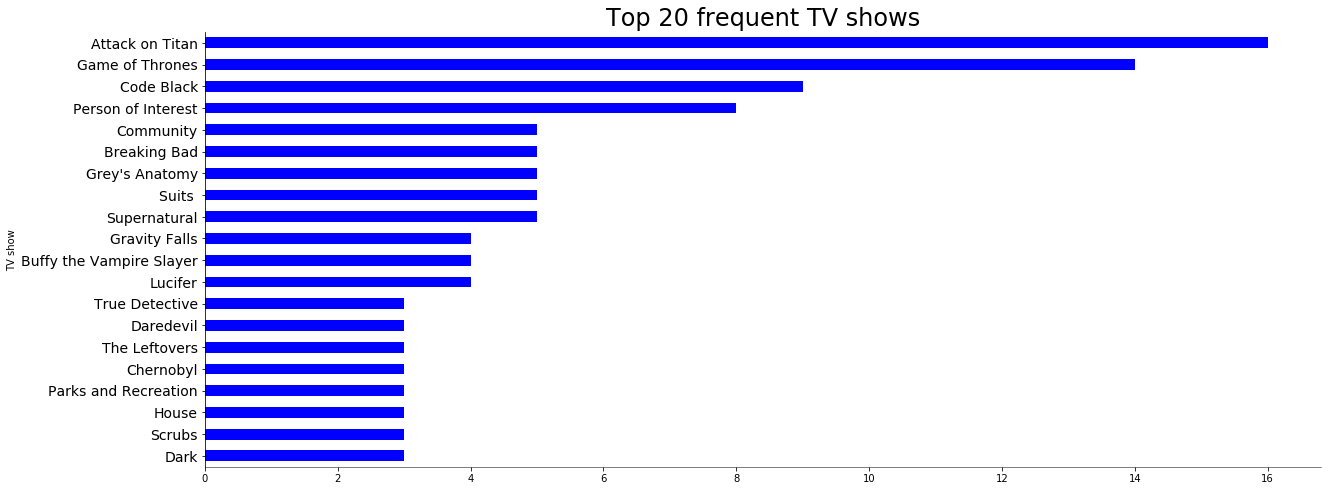

In [30]:
## A horizontal bar graph showing us which TV show got the most occurences
bar2 = df_tv8.plot(kind='barh',figsize=(20, 8), color = "blue", legend = None)
bar2
plt.yticks(id_use, fontsize = 14)
plt.title("Top 20 frequent TV shows", fontsize=24)
bar2.spines['top'].set_visible(False)
bar2.spines['right'].set_visible(False)
bar2.spines['bottom'].set_linewidth(0.5)
bar2.spines['left'].set_visible(True)
plt.show()

In [31]:
## Creating a new dataframe based on TV show and Votes based on df_tv7
df_tv9 = df_tv7[['TV show', 'Votes']]
id_use2 = df_tv9.set_index('TV show', inplace = True)
df_tv9 = df_tv9.sort_values(by = ['Votes'], ascending = True)

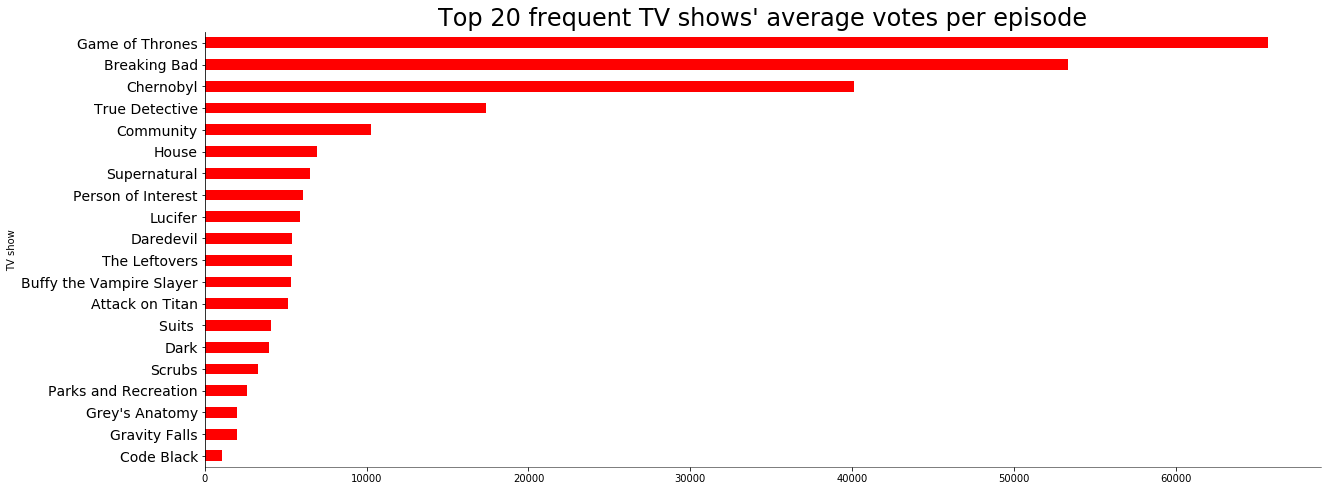

In [32]:
## A horizontal bar graph showing us which TV show got the most votes per episode
bar2 = df_tv9.plot(kind='barh',figsize=(20, 8), color = "red", legend = None)
bar2
plt.yticks(id_use2, fontsize = 14)
plt.title("Top 20 frequent TV shows' average votes per episode", fontsize=24)
bar2.spines['top'].set_visible(False)
bar2.spines['right'].set_visible(False)
bar2.spines['bottom'].set_linewidth(0.5)
bar2.spines['left'].set_visible(True)
plt.show()

In [33]:
## Creating a new dataframe based on TV show and Rating based on df_tv7
df_tv10 = df_tv7[['TV show', 'Rating']]
id_use3 = df_tv10.set_index('TV show', inplace = True)
df_tv10 = df_tv10.sort_values(by = ['Rating'], ascending = True)

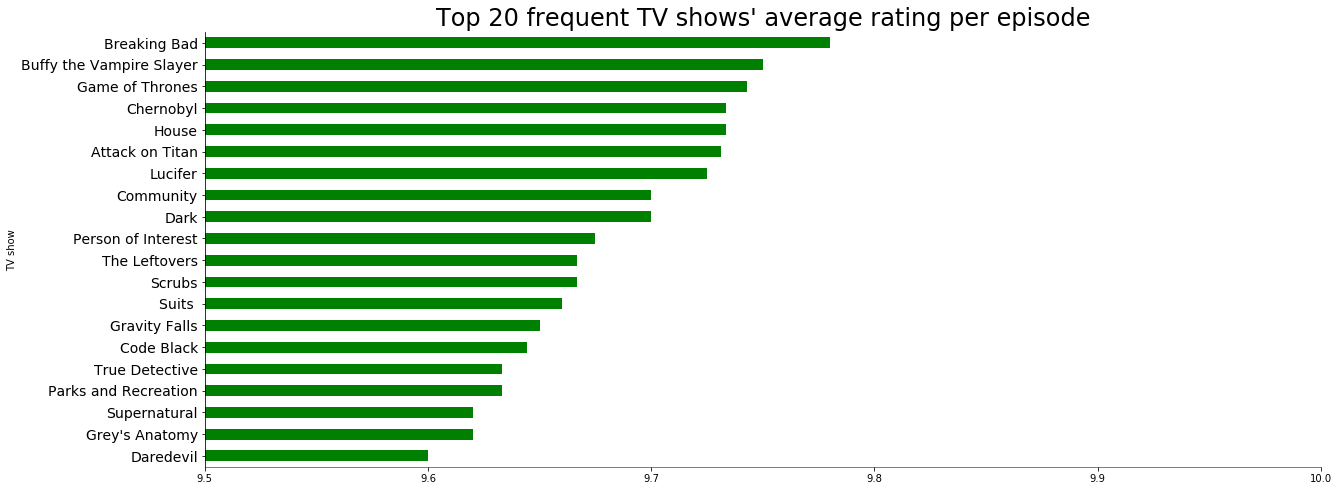

In [34]:
## A horizontal bar graph showing us which TV show got the best average ratings per episode
bar3 = df_tv10.plot(kind='barh',figsize=(20, 8), color = "green", legend = None)
bar3
plt.yticks(id_use3, fontsize = 14)
plt.xlim(9.5,10)
plt.title("Top 20 frequent TV shows' average rating per episode", fontsize=24)
bar3.spines['top'].set_visible(False)
bar3.spines['right'].set_visible(False)
bar3.spines['bottom'].set_linewidth(0.5)
bar3.spines['left'].set_visible(True)
plt.show()

### CONCLUSION

####  According to the tables and graphs, some conclusions have been made. Breaking Bad has the best episodes on IMDB among the top 200 rated episodes because it got the highest ratings on average. Game of Thrones has the highest votes on average for each episode. Attack on Titan is the most occuring episode on the list. Drama is the most occurring genre on the list. Attack on Titan's episode, Hero, is the highest rated episode on IMDB with a rating of 10.0